# Convolutional Neural Networks

# MNIST 데이터 준비 및 시각화

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


(28, 28)


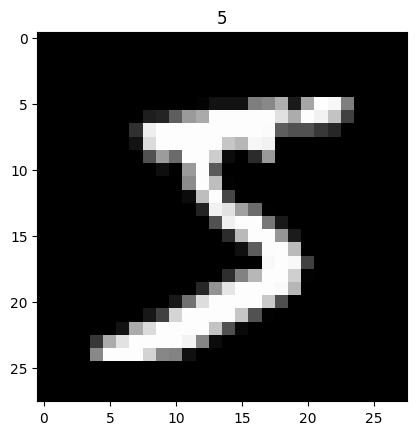

In [2]:
IMAGE_IDX = 0

image = X_train[IMAGE_IDX]
print(image.shape)

plt.imshow(image, cmap='gray')
plt.title(y_train[IMAGE_IDX])
plt.show()
# (N, H, W, C)

# CNN 레이어에 입력하기 위한 배열 편집
- 반드시 CNN 레이어는 **4차원 배열 형식**을 활용

In [4]:
# (28,28) -> (1,28,28,1)
image = image[tf.newaxis,...,tf.newaxis] # tf.newaxis : 차원을 강제로 확장
image.shape

(1, 28, 28, 1)

# Conv 레이어 사용
Keras에는 대표적인 두 가지 Conv 레이어가 존재
- Conv2D
  - 필터가 움직이는 방향이 2방향(가로, 세로)
  - 이미지 분석을 위해서 사용하는 일반적인 합성곱 레이어
- Conv1D
  - 필터가 움직이는 방향이 1방향
  - 텍스트 분석을 위해 사용하는 레이어


## Conv2D 레이어 매개변수
- `filters` : 필터의 개수 ($C_{out}$)
- `kernel_size` : 커널의 크기($H_k, W_k$)
- `strides` : 몇 개의 픽셀을 스킵하면서 필터가 입력 특성 맵을 훑게 할지 결정
  - stride가 커지면 출력 특징 맵(Output Feature Map)의 크기가 줄어든다.
  - MaxPooling 기법보다 stride 크기를 늘려서 출력 특징 맵의 크기를 줄이는 것이 요즘 추세
- `padding` : 0으로 둘러쌓여진 패딩을 만들 것인지에 대한 설정
  - `VALID` : 패딩을 만들지 않겠다.(기본)
  - `SAME` : Input Feature Map과 Output Feature Map의 크기를 똑같이 만들어주는 패딩을 설정
- `activation` : 활성화 함수를 지정하는 옵션(선택 가능)

In [5]:
# Conv의 학습은 Feature를 추려내는 필터를 학습하는 것
from tensorflow.keras.layers import Conv2D

layer = Conv2D(
    filters = 5, # 필터의 개수 -> Cout
    kernel_size = (3,3), # 커널의 세로,가로 크기
    strides = 1,
    padding='SAME'
)

layer

In [9]:
# numpy array를 tensor로 변환
image = tf.cast(image, dtype=tf.float32)
image.shape

TensorShape([1, 28, 28, 1])

In [10]:
# 케라스의 레이어 객체는 함수처럼 사용할 수 있다.
conv_output = layer(image)
conv_output.shape

TensorShape([1, 28, 28, 5])

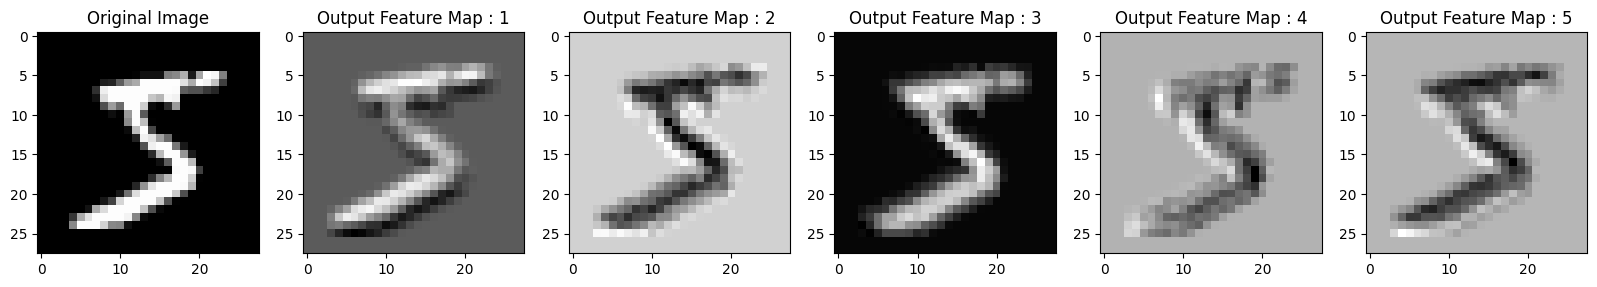

In [11]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

original_image = image[0, ..., 0]
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original Image")

output_features = conv_output[0]

for idx, ax in enumerate(axes[1:]):
  ax.imshow(output_features[..., idx], cmap='gray')
  ax.set_title("Output Feature Map : {}".format(idx + 1))

plt.show()

# Filter 시각화
- CNN에서 Filter는 가중치의 역할을한다.
- 계산 가능한 레이어(학습 대상 레이어. Dense, Conv, LSTM RNN 등등..)에서는 가중치와 편향을 확인할 수 있다.
  - `get_weights()` 함수를 이용해서 가중치와 편향을 확인할 수 있다.

In [12]:
weights = layer.get_weights()
weights

[array([[[[-0.12785158,  0.11308035,  0.29794702, -0.22884886,
           -0.18813357]],
 
         [[-0.1274666 , -0.23770706, -0.0950242 , -0.28101444,
            0.11448407]],
 
         [[-0.19042563,  0.27682796,  0.03375196,  0.2871844 ,
            0.27085045]]],
 
 
        [[[ 0.0662373 , -0.31112647,  0.14249802,  0.0942696 ,
            0.00145578]],
 
         [[ 0.00333095, -0.10543887,  0.3078678 , -0.15082145,
           -0.2602663 ]],
 
         [[ 0.32161197, -0.19084565, -0.05480012,  0.1349082 ,
           -0.16511051]]],
 
 
        [[[ 0.02984151,  0.19405726,  0.09982395, -0.31583518,
           -0.1978225 ]],
 
         [[ 0.20934728, -0.18545978, -0.08802399, -0.01207805,
            0.06738171]],
 
         [[ 0.20691189, -0.15073428,  0.20272401,  0.04823104,
           -0.2306552 ]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

- `weights[0]` : 필터 내 가중치가 들어있다.
- `weights[1]` : 편향이 들어있다.

In [13]:
# 필터(가중치)의 shape를 확인
weights[0].shape

(3, 3, 1, 5)

In [14]:
# 편향의 shape
weights[1].shape

(5,)

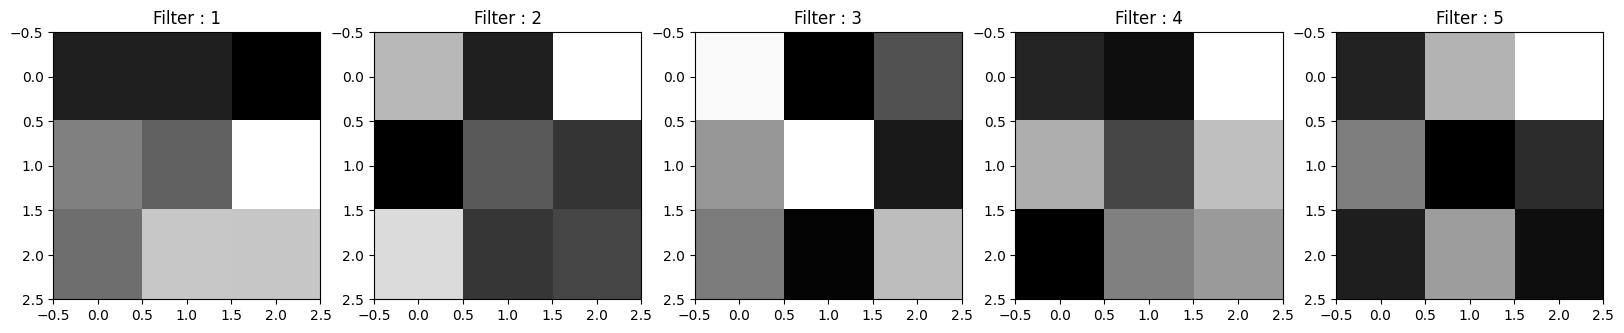

In [15]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter : {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

# ReLU 레이어 사용
- 이미지 분석에서 `ReLU`가 자주 사용된다.
- 이미지 데이터에서 음수 데이터는 필요가 없는 데이터
  - 필요 없는 음수 데이터는 제거하고, 이미지 픽셀에서 의미를 가지는 양수 데이터만 강조하기 위해 `ReLU`가 일반적으로 사용된다.
  - 최근에는 `ReLU`와 더불어 `Leakly ReLU`도 같이 사용된다. - Leakly ReLU는 생성모델에 사용됨

In [16]:
import numpy as np

np.min(conv_output), np.max(conv_output)

(-209.11176, 218.65508)

In [17]:
from tensorflow.keras.layers import ReLU

act_layer = ReLU()
act_output = act_layer(conv_output)
act_output.shape
                       

TensorShape([1, 28, 28, 5])

In [18]:
# ReLU는 음수값을 0으로 반환
np.min(act_output), np.max(act_output)

(0.0, 218.65508)

# ReLU 시각화

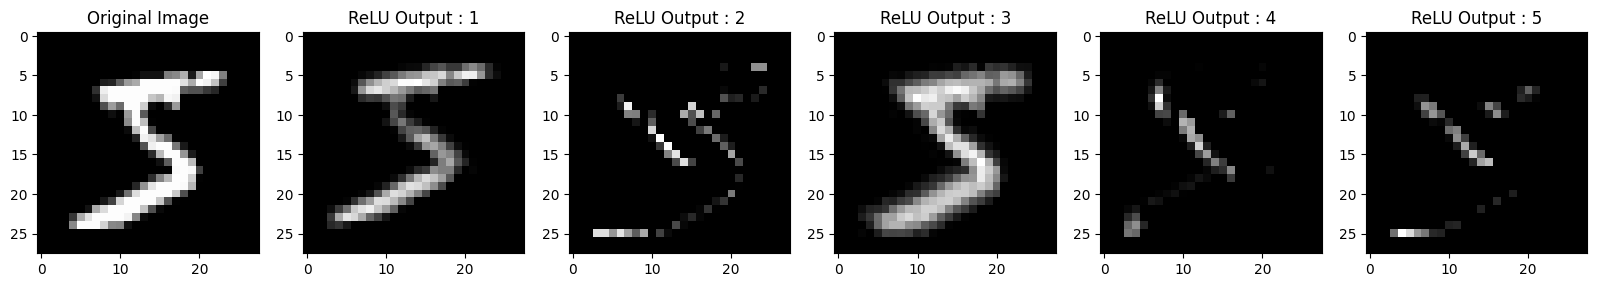

In [19]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

# MaxPooling
- 이미지 축소 및 정보의 종합을 구현
- 필요한 정보가 없어질 수도 있기 때문에 최근에는 Conv2D의 stride를 증가시키는 방법으로 이미지 축소를 구현한다.

In [20]:
from tensorflow.keras.layers import MaxPool2D

pool_layer = MaxPool2D(pool_size = 2 , strides = 2)
pool_output = pool_layer(act_output)
pool_output.shape

TensorShape([1, 14, 14, 5])

# MaxPooling 시각화

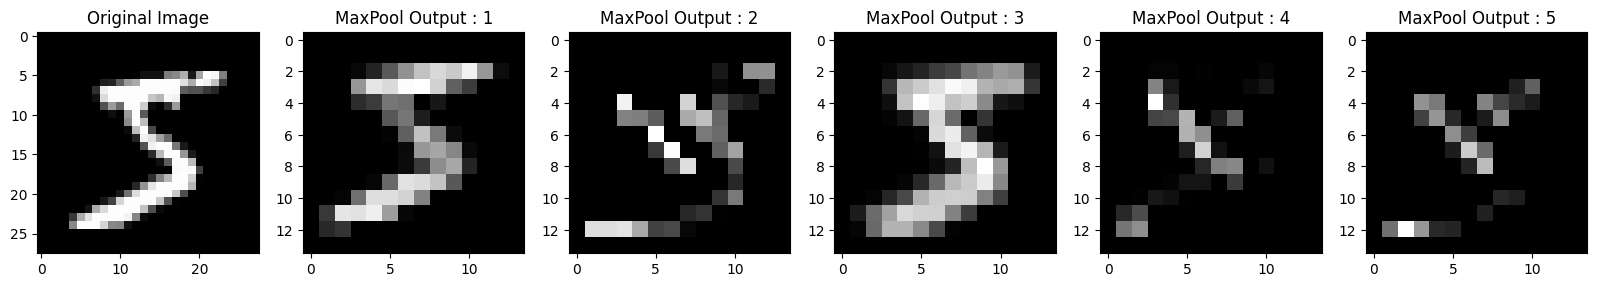

In [21]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

# Sequential Model로 MINIST 분류기 만들기

In [22]:
from tensorflow.keras.models import Sequential # 모델
from tensorflow.keras.layers import Conv2D, ReLU, MaxPool2D # Feature Extraction
from tensorflow.keras.layers import Flatten, Dense, Input # Fully Connected

model = Sequential([
    Input(shape=(28,28,1)), # 배치 사이즈를를 제외한 나머지 값을 넣는다.
    
    #### Feature Extration ####
    Conv2D(filters=64, kernel_size = 3, padding="SAME", activation='relu'),
    Conv2D(filters=64, kernel_size = 3, padding="SAME", activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=32, kernel_size = 3, padding="SAME", activation='relu'),
    Conv2D(filters=32, kernel_size = 3, padding="SAME", activation='relu'),
    MaxPool2D(pool_size=2, strides=2),

    #### Fully Connected ####
    Flatten(), # 채널이 512개 이상인 경우에는 GlobalAveragePooling을 사용

    Dense(512, activation="relu"),
    Dense(256, activation="relu"),

    # 출력층
    Dense(10, activation = "softmax")
    ])

model.summary()
# Conv Net

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

model.compile(
    optimizer=Adam(),
    loss = sparse_categorical_crossentropy,
    metrics=['acc']
)

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.20)

Epoch 1/20
1500/1500 [==============================] - 14s 6ms/step - loss: 0.1778 - acc: 0.9540 - val_loss: 0.0495 - val_acc: 0.9855
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0578 - acc: 0.9828 - val_loss: 0.0488 - val_acc: 0.9858
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0458 - acc: 0.9866 - val_loss: 0.0522 - val_acc: 0.9844
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0378 - acc: 0.9890 - val_loss: 0.0467 - val_acc: 0.9880
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0342 - acc: 0.9893 - val_loss: 0.0633 - val_acc: 0.9848
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0295 - acc: 0.9912 - val_loss: 0.0418 - val_acc: 0.9911
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0288 - acc: 0.9920 - val_loss: 0.0705 - val_acc: 0.9823
Epoch 8/20
1500/1500 [==============================] - 9s 6m